In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "airflow"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Number of jobhours used by month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby([actions.project,actions.month]).count().reset_index().groupby("month").sum()

,jobhours
month,
2021-02,5486
2021-03,6659


## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                     
                               sum      mean        max
repo                                                   
airflow                8302.298333  1.257543  20.768056
airflow-site              2.525000  0.078906   0.102778
airflow-client-python     0.261389  0.013757   0.016944
airflow-client-go         0.126389  0.021065   0.023611

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours                     
                                          sum      mean        max
repo                  workflowid                                  
airflow               1029499     7381.124722  4.193821  20.768056
                      2262792      698.483889  0.397091   3.772222
                      2794935      175.807222  0.586024   2.157778
                      2262793       35.351667  0.285094   0.793889
                      3260271       10.736667  0.008171   0.143333
airflow-site          2116473        2.525000  0.078906   0.102778
airflow               3252316        0.608611  0.000463   0.205278
airflow-client-python 6868272        0.261389  0.013757   0.016944
airflow               6217688        0.185556  0.005986   0.012778
airflow-client-go     1752210        0.126389  0.021065   0.023611

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
14117,apache,airflow,617422667,20031,2021-03-03 11:49:42+00:00,2021-03-03 14:07:21+00:00,completed,cancelled,1029499,2021-03-03 12:02:11+00:00,2021-03-03 14:06:59+00:00,True,30,74765,airflow,20.768056,2021-03
14138,apache,airflow,618261254,20050,2021-03-03 16:52:18+00:00,2021-03-03 20:11:28+00:00,completed,failure,1029499,2021-03-03 17:08:52+00:00,2021-03-03 20:10:52+00:00,True,30,68243,airflow,18.956389,2021-03
15255,apache,airflow,671785945,21056,2021-03-20 22:37:39+00:00,2021-03-21 01:22:09+00:00,completed,failure,1029499,2021-03-20 22:48:51+00:00,2021-03-21 01:21:37+00:00,True,30,67073,airflow,18.631389,2021-03
15194,apache,airflow,669768808,21000,2021-03-20 01:44:59+00:00,2021-03-20 05:40:54+00:00,completed,failure,1029499,2021-03-20 01:48:36+00:00,2021-03-20 05:40:24+00:00,True,30,62016,airflow,17.226667,2021-03
12741,apache,airflow,540303514,18795,2021-02-05 12:01:08+00:00,2021-02-05 19:13:09+00:00,completed,failure,1029499,2021-02-05 12:58:16+00:00,2021-02-05 19:12:37+00:00,True,30,60423,airflow,16.784167,2021-02
12671,apache,airflow,537493704,18731,2021-02-04 15:04:16+00:00,2021-02-04 23:15:30+00:00,completed,success,1029499,2021-02-04 16:17:12+00:00,2021-02-04 23:14:59+00:00,True,30,59743,airflow,16.595278,2021-02
12745,apache,airflow,540415861,18799,2021-02-05 12:48:10+00:00,2021-02-05 19:29:05+00:00,completed,failure,1029499,2021-02-05 13:19:39+00:00,2021-02-05 19:28:33+00:00,True,30,58107,airflow,16.140833,2021-02
12885,apache,airflow,548948372,18924,2021-02-08 18:47:48+00:00,2021-02-08 20:40:04+00:00,completed,cancelled,1029499,2021-02-08 18:49:53+00:00,2021-02-08 20:39:32+00:00,True,30,57790,airflow,16.052778,2021-02
15551,apache,airflow,687716778,21322,2021-03-25 19:41:15+00:00,2021-03-25 21:43:40+00:00,completed,failure,1029499,2021-03-25 19:48:06+00:00,2021-03-25 21:43:20+00:00,True,30,57041,airflow,15.844722,2021-03
13546,apache,airflow,590371707,19519,2021-02-22 20:17:33+00:00,2021-02-22 21:46:53+00:00,completed,failure,1029499,2021-02-22 20:17:41+00:00,2021-02-22 21:46:21+00:00,True,30,56655,airflow,15.737500,2021-02


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
5213,apache,airflow,Wait for CI images,1970.558889
23,apache,airflow,Build docs,1824.429167
4946,apache,airflow,"MySQL5.7, Py3.6: Always Core Other API CLI Pro...",1529.493333
5214,apache,airflow,Wait for PROD images,1407.984444
5106,apache,airflow,Provider packages sdist,1218.953056
5189,apache,airflow,Status of image build PROD: 3.6,1148.322222
5119,apache,airflow,Pylint,1085.672778
5142,apache,airflow,Sqlite Py3.6: Always Core Other API CLI Provid...,1082.496111
5,apache,airflow,Backport packages: sdist,1062.231667
5195,apache,airflow,Test Provider packages with 2.0.0 version sdist,969.352222


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
4,apache,airflow,success,139743
3,apache,airflow,skipped,81744
0,apache,airflow,cancelled,20682
1,apache,airflow,failure,9985
2,apache,airflow,neutral,495
8,apache,airflow-client-python,success,120
10,apache,airflow-site,success,66
5,apache,airflow-client-go,success,24
6,apache,airflow-client-python,cancelled,4
7,apache,airflow-client-python,failure,4


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

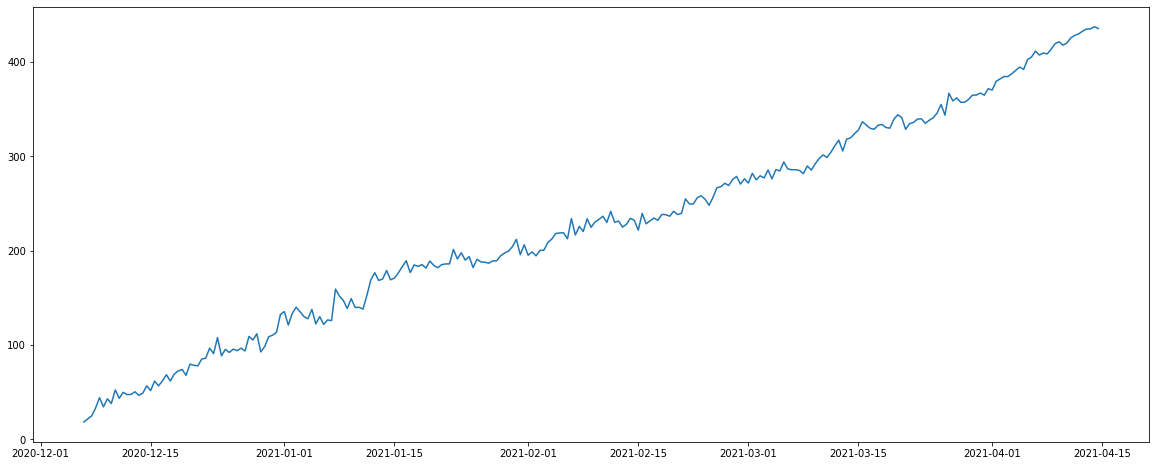

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

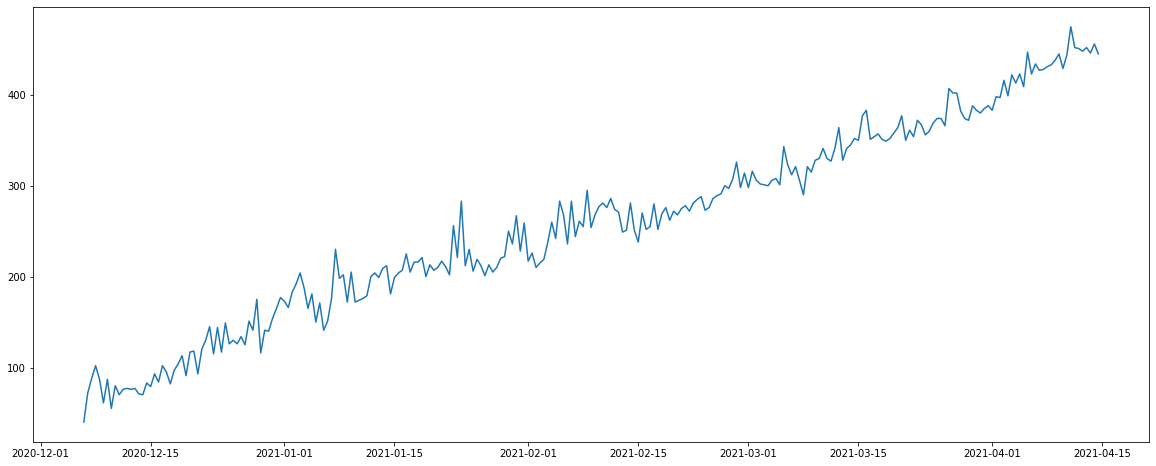

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()